## Um problema maior, do tamanho de um Návio!

Que tal pegarmos uma base de dados da vida real e trabalhar um pouco mais com algoritmos de classificação?

Dessa vez, vamos usar um base classicamente usada para aprender aprendizado de maquina: A `Titanic`. Essa base descreve, para cada passageiro no histórico návio, se ele sobreviveu ou não aquela tragédia. Dentro das nossas `features` temos informações numéricas como idade e número de parentes a bordo, catégoricas como sexo e portão de embarque e até colunas que descrevem em qual cabine aquele passageiro estava dormindo!

### Questão 1

Nossa missão aqui é predizer quando um determinado passageiro sobreviveu ou não, sendo `1` sobreviveu e `0` não sobreviveu. Mas antes vamos tomar um tempo para estudar a base! Vamos usa-la bastante nesse exercício então precisamos nos familiarizar.

Carregue a base `dataset/titanic_test.csv` e `dataset/titanic_train.csv`. Repare que como nossos dados estão separados em arquivos não iremos precisar usar o train_test_split!

Através do arquivo de treino (`dataset/titanic_train.csv`) Visualize graficamente cada coluna, suas distribuições, sua cardinalidade, etc...

Talvez você irá precisar de um catálogo explicando o que cada coluna que pode ser [encontrado aqui](https://www.kaggle.com/c/titanic/data).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Questão 1
Escreva aqui o comando para importar os dados do arquivo titanic_train.csv para o seu dataframe usando pandas \
lembra como ler(read em inglês) o arquivo?

In [3]:

import pandas as pd

df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

# Questão 2
Agora de uma olhada nos dados para se familizarizar com as colunas númericas. Dica: descreva os dados? (describe)

In [5]:

df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


# Questão 3
sera que temos dados nulos? se sim, quantos? (isnull com um sum)

In [6]:

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Questão 4
plot um gráfico contando (count) a quantidade de pessoas que sobreviveram. Essa informação está na coluna `Survived`\
dica1 plt.figure(figsize=(8,6))

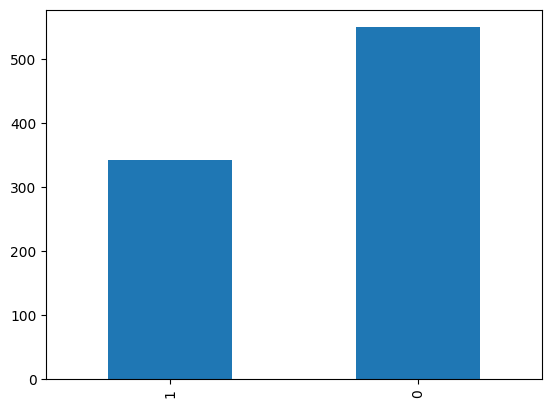

<Figure size 800x600 with 0 Axes>

In [10]:
df_train.Survived.value_counts().sort_values().plot(kind='bar') 
plt.figure(figsize=(8,6))
plt.show();

# Questão 4
plot um gráfico contando (count) a quantidade de pessoas por gênero. Essa informação está na coluna `Sex` \
dica1 plt.figure(figsize=(8,6))

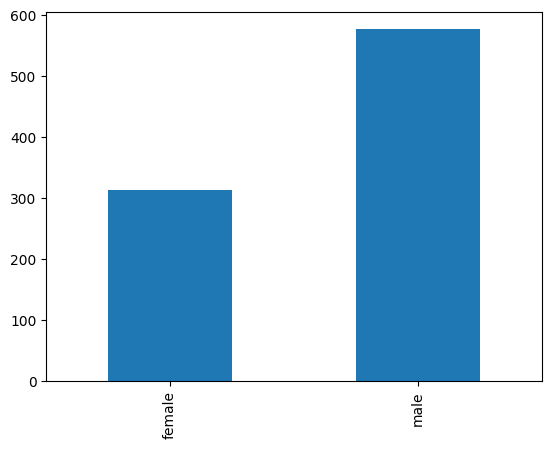

<Figure size 800x600 with 0 Axes>

In [11]:
df_train.Sex.value_counts().sort_values().plot(kind='bar') 
plt.figure(figsize=(8,6))
plt.show();

# Questão 6
plot um gráfico contando (count) a quantidade de pessoas que sobreviveram por sexo. Essas informações estão nas colunas `Survived` e `Sex`\
dica1 plt.figure(figsize=(8,6))\
dica 2 x='Survived', hue='Sex'

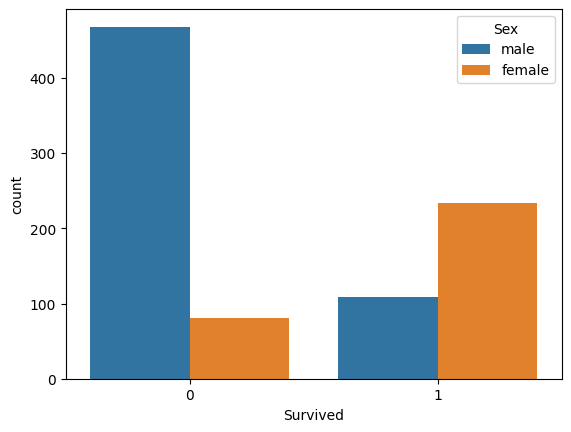

<Figure size 800x600 with 0 Axes>

In [13]:
sns.countplot(data=df_train, x="Survived", hue="Sex")
plt.figure(figsize=(8,6))
plt.show();

# Questão 7
agora veja como são os sobreviventes de acordo com as suas classes. Essa informação está na coluna `Pclass`\
dica1 plt.figure(figsize=(8,6))

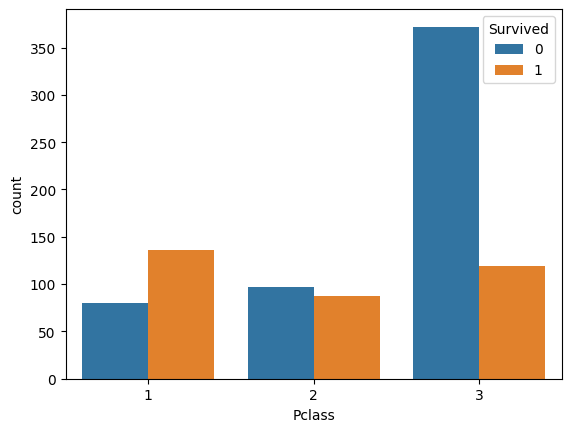

<Figure size 800x600 with 0 Axes>

In [14]:
sns.countplot(data=df_train, x="Pclass", hue="Survived")
plt.figure(figsize=(8,6))
plt.show();

# Questão 8
Que tal agora fazemos um boxplot para juntarmos em um mesmo gráfico quem sobreviveu, seu gênero e sua idade?\
dica1 plt.figure(figsize=(8,6))\
dica 2 x='Survived', y= 'Age', hue='Sex'

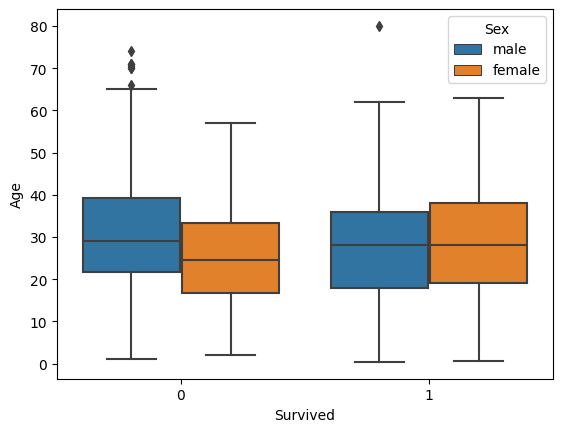

<Figure size 800x600 with 0 Axes>

In [15]:
sns.boxplot(data=df_train, x='Survived', y= 'Age', hue='Sex')
plt.figure(figsize=(8,6))
plt.show();

# Questão 9
Como seria um boxplot da classe `Pclass` pela tarifa `Fare`?\
dica1 plt.figure(figsize=(8,6))

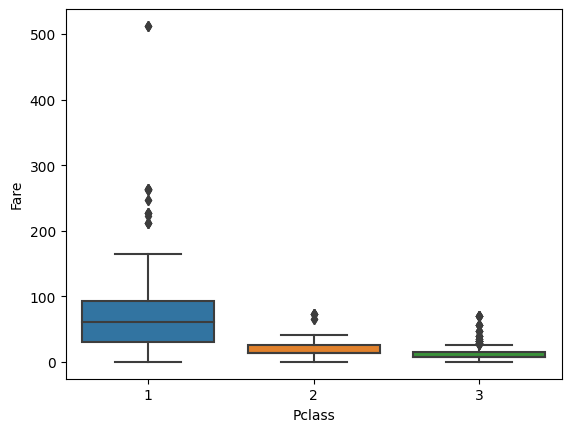

<Figure size 800x600 with 0 Axes>

In [17]:
sns.boxplot(data=df_train, x='Pclass', y= 'Fare')
plt.figure(figsize=(8,6))
plt.show();

## Usando Regressão Logística em problemas reais

A regressão logística é um algoritmo de classificação binária, porém ele usa os mesmos princípios da regressão linear para resolver seus problemas.

Logo, nossa entrada `X` precisa ser uma sequência de colunas numéricas e `y` uma coluna única binária.

Olhando para a base do Titanic, é notavel que nosso `y` esta num formato adequado, porém, muitas colunas promissoras para nosso modelo não estão, como `gender`, `Pclass` e `Embarked`.

Para torna-las númericas, precisamos **transforma-las em mais colunas e torna-las boolenas**. Isso porque não sabemos se elas tem alguma correlação, logo seria errado colocar por exemplo `Male = 1` e `Female = 0`. Para esse processo usamos um método de pré-processamento chamada **one-hot enconding**. Ainda vamos aprofundar nesse conceito na próxima aula. Por enquanto será suficiente apenas executar os comandos abaixo.

### OneHotEnconding

Rode o comando do scikit learn de OneHotEnconding nas colunas `gender`, `Pclass` e `Embarked`. Se quiser entender melhor o que está acontecendo, você acha a [documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) mas sinta-se livre para encontrar suas próprias fontes.

In [22]:
from sklearn.preprocessing import OneHotEncoder

train_df = pd.read_csv('titanic_train.csv') #aqui estamos carregando os dados de train para o dataframe

encoder = OneHotEncoder(sparse=False)

train_X_encoded = pd.DataFrame(encoder.fit_transform(df_train[['Sex', 'Pclass', 'Embarked']]))
train_X_encoded.columns = encoder.get_feature_names(['Sex', 'Pclass', 'Embarked'])
train_df.drop(['Sex', 'Pclass', 'Embarked'] ,axis=1, inplace=True)
train_df = pd.concat([df_train, train_X_encoded ], axis=1)

train_df.head(2) #novo dataframe após rodarmos o OneHotEncoder. Você consegue ver o que mudou?

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Normalizando

Note que agora, todas as nossas colunas categóricas relevantes tem suas contrapartes categóricas (inclusive mais de uma).

Esse processo que estamos fazendo se chama _pré-processamento_ e está centrado em tornar nossas bases adequadas para o algoritmo que pretendemos usar.

Vamos então entender um novo processo de pré-processamento, agora para variáveis númericas. Uma boa prática que facilita o trabalho do nosso modelo é **normalizarmos variáveis numéricas**. Isto é, deixa-las todas com um `range` semelhante.

Para isso podemos usar o `StandardScaler`, da biblioteca sklearn, para aplicarmos essas operações em nossa base, vamos aplica-las nas colunas `Age`, `SibSp` e `Fare`.

Lembrando que para entender como usa você deve pesquisar por referência e exemplos na internet, e nunca se esqueça de olhar a [documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Novamente, não se preocupe tanto com esse passo. Os comandos a serem executados estão logo abaixo. Substitua as colunas originais pelo resultado alcançado. Mas tente entender o que está acontecendo

In [23]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'SibSp', 'Fare']

ss = StandardScaler()

ss.fit(train_df[features])

train_df[features] = ss.transform(train_df[features])

train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,0.432793,0,A/5 21171,-0.502445,...,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,0.432793,0,PC 17599,0.786845,...,C,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Eliminando valores nulos

Agora antes de irmos adiante existe uma coisa sobre regressão logística e valores numéricos que precisamos saber: _Regressões odeiam valores nulos!_ (você consegue entender o porque disso?)

Analise as três colunas geradas e verifique se temos valores nulos nelas

Substitua esses valores nulos pela mediana, essa é uma tecnica comum para evitar problemas de valores nulos.

Uso métodos do pandas para isso. Essa aqui eu deixo com vocês escrever o código para fazer isso.

# Questão 10
preencha os valores vazios da cooluna `Age` com a média da idade dos passageiros

In [27]:
train_df.Age.fillna(train_df.Age.median(), inplace=True)

### Ajustando o arquivo de teste

Como voce percebeu, fizemos diversas alterações nos dados que carregamos do arquivo 'titanic_train.csv'
Precisamos repetir os mesmos passos para os dados de teste! Os comandos são os mesmos.

Carregue a base de teste e faça as mesmas transformações (`OneHotEnconding` e `StandardScalar`).

In [28]:
test_df = pd.read_csv('titanic_test.csv')

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

features = ['Age', 'SibSp', 'Fare']
test_df[features] = ss.transform(test_df[features])

encoder = OneHotEncoder(sparse=False)

test_X_encoded = pd.DataFrame(encoder.fit_transform(test_df[['Sex', 'Pclass', 'Embarked']]))
test_X_encoded.columns = encoder.get_feature_names(['Sex', 'Pclass', 'Embarked'])
test_df.drop(['Sex', 'Pclass', 'Embarked'] ,axis=1, inplace=True)
test_df = pd.concat([test_df, test_X_encoded ], axis=1)

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Perceba que a coluna `Survived` não esta no arquivo `titanic_test.csv`,ao invés disso está no arquivo `titanic_test_results.csv`.
Vamos aproveitar e já deixar tudo preparado. Apenas execute os comandos abaixo mas sempre entendendo o que está acontecendo!

In [29]:
features = ['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'] #estamos escolhendo as colunas/features/variáveis que usaremos no nosso modelo

train_df_X = train_df[features] #carregamos apenas elas para o nosso X

train_df_y = train_df[['Survived']] #aqui carregamos o nosso Y

### Fazendo a previsão

Agora vamos aplicar a regressão logística!

Lembre-se de usar apenas as colunas numéricas que geramos nos últimos dois exercícios. Para o arquivo de testes nos já retiramos mas garanta passando apenas as colunas que quer usar



Apresente na tela a `accuracy_score`. Para fins do exercício usaremos a acurácia para ver quão bom são nossos modelos. Lembre-se que quanto maior a nossa acurácia, melhor o modelo! (será que isso é sempre verdade?)

# Questão 11
rode um modelo (modeloLR) de regressão logiística (LogisticRegression no scikit learn)/
importe o modelo, inicie o modelo e depois treine o modelo (fit)

In [42]:
from sklearn.linear_model import LogisticRegression
modeloLR = LogisticRegression(max_iter=10000)
modeloLR.fit(train_df_X, train_df_y)#ajustando o modelo com os dados de treinamento

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

### Verificando a performance nos dados de testes
Como nossos dados estão em 2 arquivos diferentes, agora que temos o modelo treinado (.fit()) precisamos ver como ele se sai com dados q nunca viu. Os dados do arquivo "titanic_test.csv" nunca foram vistos pelo modelo. Vamos carrega-lo e colocar as colunas preditoras ou variáveis independentes para ser o nosso X.
O valor correto, variável dependente (a resposta final) está também em um terceiro arquivo "titanic_test_results.csv". Dessa forma esses são os dados que vamos levar para o nosso Y

Após carregar esses dois arquivos em dataframes, precisamos pegar o modelo treinado e ver como ele de fato se sai com esses dados. Apenas execute os comandos abaixo mas procure entender o que está acontecendo!

In [34]:
features = ['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'] #escolhendo quais features iremos usar

test_df['Embarked_nan'] = 0

test_df_X = test_df[features] #carregando as variáveis independentes

test_df_y = pd.read_csv('titanic_test_results.csv')[['Survived']] #carregando a variável dependente


### Calculando como o modelo se saiu com os dados de teste
Agora que todos os dados já foram é a hora de pedir para o modelo prever o resultado com base nos dados do arquivo teste e após isso, vamos calcular a acurácia do modelo usado "accuracy_score". Não se preocupe, essa última parte do código já está escrita para você.

# Questão 12
Agora é a hora da verdade!\
Rode um predict no seu modelo salvando o resultado em y_predRL

In [43]:
y_predRL = modeloLR.predict(test_df_X)

### Verificando o resultado Final
Execute os comandos abaixo para sabermos a acurácia do nosso modelo! E ae, o que achou do resultado final? Bom? Ruim? Suficiente?

In [44]:
from sklearn import metrics
#por fim, comparamos o valor que o modelo previu (y_predRL) com o valor que ele deveria ter previsto (test_df_y)
print("Acurácia do modelo de Regressão Logística: {}".format(metrics.accuracy_score(test_df_y, y_predRL).round(8)))

Acurácia do modelo de Regressão Logística: 0.95215311


## Ampliando a Caixa de Ferramentas

Muito bem, nos últimos preparamos dados reais para aplicar em um algoritmo de regressão logistica e obter um resultado satisfatório, mas e agora?

Se você acessar a [documentação do Sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) verá que existem diversos algoritmos de classificação, como vamos saber se, dentre todas as alternativas a nossa regressão logistica é a melhor?

Uma atividade comum entre ciêntistas de dados é treinar inúmeros modelos para um mesmo problema e compará-los através de alguma ferramenta estatística. Muitas vezes um modelo especifico pode performar melhor diante de um problema por algum detalhe que muitas vezes o ciêntista de dados desconhece no momento.

Então, para essa última etapa, vamos apresentar para vocês outros algoritmos de classificação. Repita os últimos passos de treino, predição e acurácia para vermos como eles se saem.

### DecisionTree

A arvore de decisão é uma das estruturas mais intuitivas de classificação, ela basicamente pega as colunas que temos e cria regras de separação até que tenhamos uma sequencia de regras que atribui com alguma acurácia entre nossas classes.

A melhor forma de entender esse modelo é usá-lo e visualizar sua árvore, por isso vamos trabalhar com a base do Titanic novamente.

# Questão 13
Use uma árvore de decisão para criar um novo modelo (modeloDT). Passe como parâmetro para a árvore a profundidade máxima de 3 (max_depth=3)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
modeloDT = DecisionTreeClassifier(random_state=0,max_depth=3)
modeloDT.fit(train_df_X, train_df_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Visualizando a árvore de decisão

Uma das vantagens das árvores de decisão é que podemos visualizar o seu resultado. Execute o código abaixo para plotarmos o resultado final e tente entender passo a passo o que está acontecendo.

O método `plot_tree` presente na biblioteca do sklearn apresenta na tela o modelo que acabamos de construir. Execute os comandos abaixo e interprete o resultado

In [46]:
test_df_X.columns #visualizando as colunas usadas no teste

Index(['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

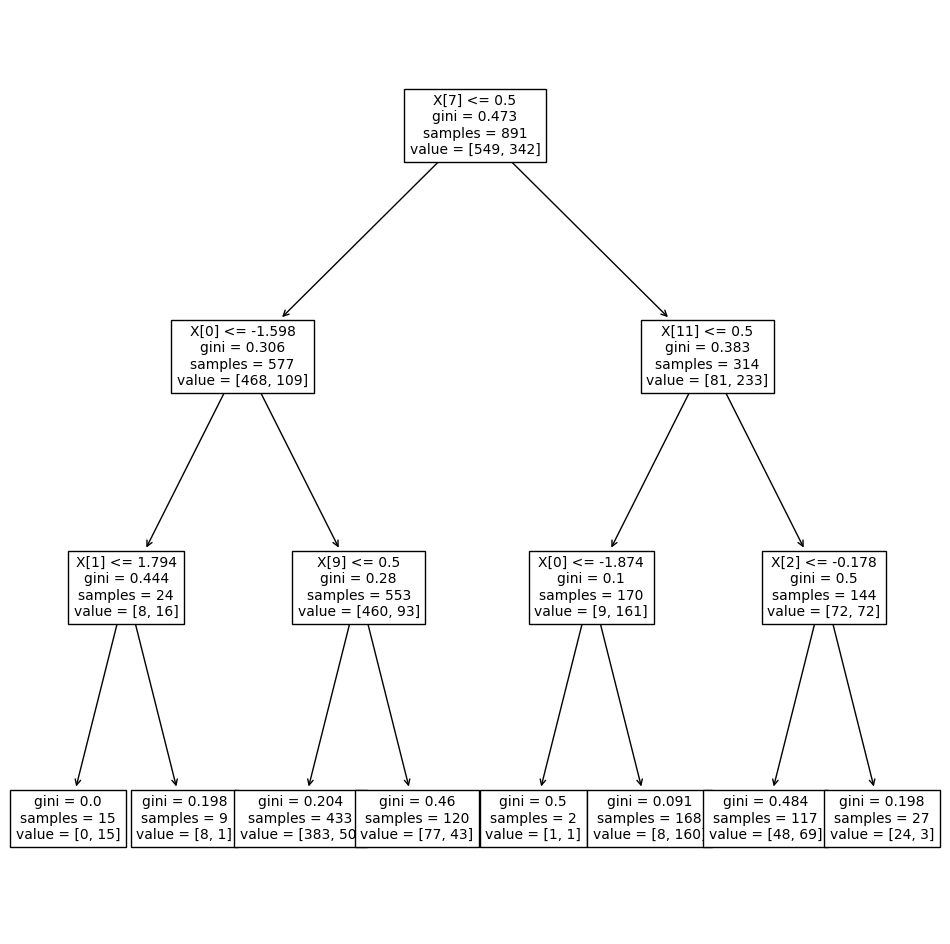

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(modeloDT, fontsize=10)
plt.show()

## Support Vector Machine

Suppoer Vector Machine, Máquina de vetores de suporte ou simplesmente SVM é a abordagem popular de classificação baseado em um conjunto de separadores lineares, a matemática por trás é bem interessante e você pode [conhecer mais por aqui](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989). Porém, hoje, focaremos apenas na implementação.

Procure pela implementação `SVC` do skelearn, que é a implementação de SVM aplicada a problemas de classificação e aplique a nossa base `Titanic`. Procure também entender os parametros `C` e `kernel` do modelo, brinque um pouco com eles e teste diferentes valores, o que você percebe no resultado?


# Questão 14
Use o SVM (SVC - modeloSVC). Para prever os valores. Troque o `Kernel` do modelo e o hiperparâmetro C.\
Será que você consegue obter valores melhores do que os já alcançados até agora?

In [49]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
modeloSVC = svm.SVC()
modeloSVC.fit(train_df_X, train_df_y)

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [54]:
predicao_modelo = modeloLR.predict(test_df_X)
from sklearn.metrics import accuracy_score
accuracy_score(test_df_y, predicao_modelo)

0.9521531100478469

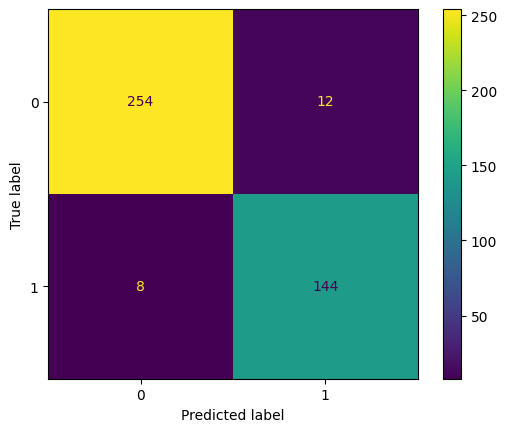

In [52]:
cm = confusion_matrix(test_df_y, predicao_modelo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

# Questão 15
Use o Naive Bayes (modeloNB).\
Será que você consegue obter valores melhores do que os já alcançados até agora?

In [55]:
from sklearn.naive_bayes import GaussianNB
modeloNB = GaussianNB() # criando o modelo
modeloNB.fit(train_df_X, train_df_y)

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [58]:
predicao_modelo = modeloNB.predict(test_df_X)
accuracy_score(test_df_y, predicao_modelo)

0.7105263157894737

# Questão 16
O bom e conhecido KNN! Use o KNN (modeloSVC). Para prever os valores.\
Será que você consegue obter valores melhores do que os já alcançados até agora?\
se você usar n_neighbors=2, o resultado melhora ou piora? E se for n_neighbors=10?\

In [60]:
from sklearn.neighbors import KNeighborsClassifier #importando o modelo

modeloSVC = KNeighborsClassifier(n_neighbors=2) #modelo que considera 2 vizinhos próximos na decisão
modeloSVC.fit(train_df_X, train_df_y)
predicao_modelo = modeloSVC.predict(test_df_X)
accuracy_score(test_df_y, predicao_modelo)

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8229665071770335

In [61]:
modeloSVC = KNeighborsClassifier(n_neighbors=10) #modelo que considera 10 vizinhos próximos na decisão
modeloSVC.fit(train_df_X, train_df_y)
predicao_modelo = modeloSVC.predict(test_df_X)
accuracy_score(test_df_y, predicao_modelo)

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8899521531100478

# Questão 17
Rode o otimizador SGD\
se você rodar o modelo mais de uma vez, sem alterar nada, o resultado final muda?\
Como saber qual o melhor resultado podemos obter com esse modelo?

In [63]:
from sklearn.linear_model import SGDClassifier
modelo = SGDClassifier(loss="hinge", max_iter=1000,random_state=0)
modelo.fit(train_df_X, train_df_y)
predicao_modelo = modelo.predict(test_df_X)
accuracy_score(test_df_y, predicao_modelo)

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9234449760765551

# Questão 18
Rode o otimizador RandomForest\
se você rodar o modelo mais de uma vez, sem alterar nada, o resultado final muda?\
Como saber qual o melhor resultado podemos obter com esse modelo?\
se alterarmos o valor de n_estimators e min_samples_leaf, os resultados mudam?

In [64]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, min_samples_leaf=2,random_state=0)
modelo.fit(train_df_X, train_df_y)
predicao_modelo = modelo.predict(test_df_X)
accuracy_score(test_df_y, predicao_modelo)

C:\Users\leolk\AppData\Local\Temp\ipykernel_13152\4027312820.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(train_df_X, train_df_y)


0.8660287081339713

In [66]:
modelo = RandomForestClassifier(n_estimators=50, min_samples_leaf=2,random_state=0)
modelo.fit(train_df_X, train_df_y)
predicao_modelo = modelo.predict(test_df_X)
accuracy_score(test_df_y, predicao_modelo)

C:\Users\leolk\AppData\Local\Temp\ipykernel_13152\1931805923.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(train_df_X, train_df_y)


0.8732057416267942

In [68]:
modelo = RandomForestClassifier(n_estimators=100, min_samples_leaf=4,random_state=0)
modelo.fit(train_df_X, train_df_y)
predicao_modelo = modelo.predict(test_df_X)
accuracy_score(test_df_y, predicao_modelo)

C:\Users\leolk\AppData\Local\Temp\ipykernel_13152\3194924280.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(train_df_X, train_df_y)


0.8875598086124402

In [74]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = modelo, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the random search model
grid_search.fit(train_df_X, train_df_y)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(min_samples_leaf=4,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             verbose=2)

In [75]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1400}

In [83]:
predicao_modelo = grid_search.predict(test_df_X)
accuracy_score(test_df_y, predicao_modelo)

0.8755980861244019

# Questão 19
Qual modelo entregou a maior acurácia?

In [84]:
# O SVM